In [521]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sentiment=pd.read_csv("NLP_Project_SentimentTagged.csv")
market=pd.read_csv("NLP_Project_NSEMovement.csv")

In [522]:
market.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Shares Traded',
       'Turnover (Rs. Cr)'],
      dtype='object')

In [523]:
sentiment.columns

Index(['Unnamed: 0', 'Date', 'Clean_Tweet', 'word_count', 'textstoprem',
       'sentiment_compound_polarity', 'sentiment_neutral',
       'sentiment_negative', 'sentiment_pos', 'sentiment_type', 'SEN'],
      dtype='object')

In [524]:
market["movement"]=market["Close"]-market["Open"]
market
a=market["movement"].iloc[0:15,]

In [525]:
DateNew=[]
for i in sentiment["Date"]:
    if i in  ["8/11/2016","9/11/2016","10/11/2016","11/11/2016","15/11/16","16/11/16","17/11/16","18/11/16","21/11/16","22/11/16","23/11/16","24/11/16","25/11/16","28/11/16","29/11/16"]:
        DateNew.append(i)
    else:
        DateNew.append("market_closed")

In [526]:
DateNew=pd.Series(DateNew)
sentiment["DateNew"]=DateNew
#Consider only dates for which we have both tweets and market movement available
sentiment1=sentiment[sentiment["DateNew"]!="market_closed"]

b=["8/11/2016","9/11/2016","10/11/2016","11/11/2016","15/11/16","16/11/16","17/11/16","18/11/16","21/11/16","22/11/16","23/11/16","24/11/16","25/11/16","28/11/16","29/11/16"]
c=[]
for i in b:
    d=len(sentiment1[(sentiment1["DateNew"]==i) &(sentiment1["sentiment_type"]=="POSITIVE")])
    c.append(d)
c
c=pd.Series(c)
c=pd.DataFrame({"+ve Senti's":c})

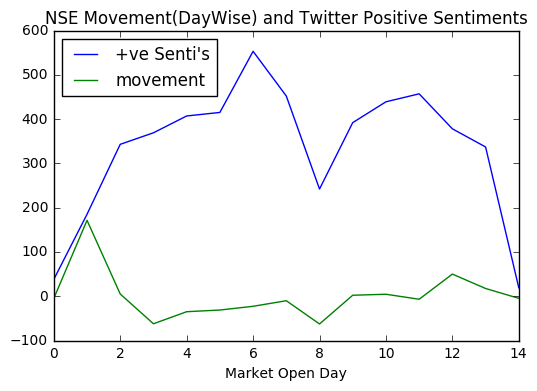

In [527]:
fig,ax=plt.subplots()
ax.plot(c["+ve Senti's"])
ax.plot(a)
ax.set_title("NSE Movement(DayWise) and Twitter Positive Sentiments")
ax.set_xlabel("Market Open Day")
ax.legend(loc="upper left")
plt.show()